# Creating forcing datasets for pySUMMA

[HydroShare Resource Link](https://www.hydroshare.org/resource/c75ad34da9d642aca6e51126bfff45d1/)

Here we will put together forcing data setups for CAMELs.
This requires hourly forcings of
 - temperature (K)
 - precipitation (kg/m^2/s^1)
 - shortwave radiation (W/m^2)
 - longwave radiation (W/m^2)
 - specific humidity (g/g)
 - air pressure (Pa)
 - wind speed (m/s)
 
NLDAS hourly forcings are considered to be "truth". 
We take NLDAS hourly forcings and give them their mean daily values for each variable in turn (or all variables). 
Then we take NLDAS daily forcings of maximum and minimum temperature, total precipitation, and mean windspeed.

Before we start, the first thing we need to do is make sure SUMMA 3.0.3 and pySUMMA 3.0.3 are installed. Commands:

In [1]:
conda list summa

# packages in environment at /opt/conda/envs/pysumma:
#
# Name                    Version                   Build  Channel
pysumma                   3.0.3                    pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


In [2]:
!/usr/bin/summa.exe -v

----------------------------------------------------------------------
     SUMMA - Structure for Unifying Multiple Modeling Alternatives    
                           Version: v3.0.3
               Build Time: Thu Nov 19 01:41:43 UTC 2020
                  Git Branch: tags/v3.0.3-0-g4ee457d
          Git Hash: 4ee457df3d3c0779696c6388c67962ba76736df9
----------------------------------------------------------------------


In [3]:
conda list pysumma

# packages in environment at /opt/conda/envs/pysumma:
#
# Name                    Version                   Build  Channel
pysumma                   3.0.3                    pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


<br>
Load the imports.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
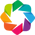

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geoviews as gv
import geopandas as gpd
import holoviews as hv
import xarray as xr
import ogr
import cartopy

hv.notebook_extension('bokeh')

<br>
Keep these the same.

In [6]:
import os
top_folder = os.path.join(os.getcwd(), 'summa_camels')
settings_folder = os.path.join(top_folder, 'settings.v1')
shapefile = os.path.join(os.getcwd(), 'basin_set_full_res_simple/HCDN_nhru_final_671.shp')

<br>

# Our study location: the CAMELs basins

Download NLDAS forcing data from HydroShare OpenDAP (http://hyrax.hydroshare.org/opendap/hyrax/)

In [7]:
extra_vars0 = xr.open_dataset('http://hyrax.hydroshare.org/opendap/hyrax/a28685d2dd584fe5885fc368cb76ff2a/data/contents/nldasForcing1980to2018.nc')
extra_vars0['data_step'] = 3600
del extra_vars0.attrs['_NCProperties']

### THIS IS IMPORTANT! Select here what basins you want to run. (HRU_ID: 1413500)

In [8]:
# All HRUs, select out all or some to look at, assuming have GRUs same as HRUs here
#the_hru = np.array(extra_vars0['hruId']) # run all
the_hru = np.array([1413500])
the_gru = the_hru
extra_vars1 = extra_vars0.sel(hru=the_hru)
extra_vars = extra_vars1.isel(time=slice(0, 3*365*24))
print(the_hru)

[1413500]


In [9]:
gdf = gpd.read_file(shapefile)
shapes = cartopy.io.shapereader.Reader(shapefile)
list(shapes.records())[0]

<Record: <shapely.geometry.polygon.Polygon object at 0x7f25d63709d0>, {'hru_id': 1013500, 'ann_P': 0.0, 'lon_cen': -68.56551, 'lat_cen': 47.01169, 'AREA': 2303988086.78, 'elev_mean': 277.493489583, 'ave_T': None, 'july_T': None, 'Perimeter': 647993}, <fields>>

In [10]:
# Convert the data from an xarray dataset to a pandas dataframe 
out_df = extra_vars0['hru']
out_df = out_df.to_dataframe()
# Make sure we have some metadata to join with the shapefile
out_df['hru_id'] = gdf['hru_id'].values
#search for the ones with desired records
find_rec = out_df.loc[the_hru,:]['hru_id']
#look at attributes
desired_shapes = []
for i in find_rec:
    for s in shapes.records():
        if s.attributes['hru_id'] == i :
            desired_shapes.append(s)

In [11]:
# Create backgound
mapp =gv.tile_sources.StamenTerrainRetina.opts(width=900, height=500)
# Create the shape plot
poly = gv.Shape.from_records(shapes.records(), out_df, index=['hru_id'], on='hru_id',crs=cartopy.crs.PlateCarree())
poly2 = gv.Shape.from_records(desired_shapes,out_df.loc[the_hru,:],on='hru_id', crs=cartopy.crs.PlateCarree())
poly = poly.opts(cmap='plasma', tools=['hover'], colorbar=True, alpha=0.8)
poly2 = poly2.opts(fill_color='cyan', line_color='cyan', alpha=0.8)
# Plot
mapp*poly*poly2

:Overlay
   .WMTS.I      :WMTS   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]   (hru_id)
   .Polygons.II :Polygons   [Longitude,Latitude]

Basins are colored by index values and are hoverable for index values and IDs. Selected basins are higlighted in cyan.

In [12]:
images_array1 = ['https://ral.ucar.edu/staff/wood/watersheds/basin_figs/01413500.watershed.png','https://ral.ucar.edu/staff/wood/watersheds/dem_figs/01413500.dem.png']

In [13]:
import ipyplot
ipyplot.plot_images(images_array1, max_images=20, img_width=400)

<br>

# Make SUMMA files the correct HRUs: 1413500
We have to select out only the HRUs of the basins we are using.

In [14]:
# Attributes 
attrib = xr.open_dataset(settings_folder+'/attributes.camels.v2.nc')
attrib = attrib.assign_coords(hru=attrib['hruId'])
attrib = attrib.assign_coords(gru=attrib['gruId'])
gg = attrib['gruId'] # save because gruId was missing from the parameter file
attrib = attrib.sel(hru=the_hru)
attrib = attrib.sel(gru=the_gru)
attrib = attrib.drop(['hru','gru']) #summa doesn't like these to have coordinates
attrib.to_netcdf(settings_folder+'/attributes.nc')

In [15]:
# Parameters
param = xr.open_dataset(settings_folder+'/trialParams.camels.Oct2020.nc')
param = param.assign_coords(hru=param['hruId'])
param = param.assign_coords(gru=gg) # there should be a gruId in here, but there wasn't
param = param.sel(hru=the_hru)
param = param.sel(gru=the_gru)
param = param.drop(['hru','gru']) #summa doesn't like these to have coordinates
param.to_netcdf(settings_folder+'/parameters.nc')

<br>
Lastly we will need to make the constant initial conditions file.

In [16]:
!cd {settings_folder}; source activate /opt/conda/envs/pysumma; python gen_coldstate.py attributes.nc init_cond.nc int

read output outPolyIds ('hruId') from example domain file
writing output file
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data
adding data


<br>

# Forcing files of NLDAS with Constant Daily Values
Here we make the NLDAS data hourly values into constant 24 hourly values for each forcing variable. 
We need to make these 24 hours represent a local day, so local time zones, such that later calculations on days work. 
Since SUMMA will impose that shortwave radiation is 0 when the sun is below the horizon, we distribute the constant shortwave radiation only during the daylight hours.
Other changes inside SUMMA are that specific humidity will be lowered in order that relative humidity does not exceed 100%, and tiny windspeeds will be elimated.

<br>
Write this file for pySUMMA forcing and save the forcing file name.

In [17]:
%%time
truth = extra_vars
t0 = truth['time'].values[0] 
tl = truth['time'].values[-1]
t0_s = pd.to_datetime(str(t0))
t0_sf =t0_s.strftime('%Y%m%d')
tl_s = pd.to_datetime(str(tl))
tl_sf =tl_s.strftime('%Y%m%d')
ffname ='NLDAStruth_' + t0_sf +'-' + tl_sf +'.nc'
truth.to_netcdf(top_folder+'/forcing/truth/'+ffname)
fflistname = settings_folder+'/forcingFileList.truth.txt' 
file =open(fflistname,"w")
file.write(ffname)
file.close()

CPU times: user 1.86 s, sys: 480 ms, total: 2.34 s
Wall time: 7.24 s


<br>
Now we can make the daily data, first shifting to local time zones with longitude.

In [18]:
# Separate out variables with no time dimension and add offset
ds = truth
ds_withtime = ds.drop_vars([ var for var in ds.variables if not 'time' in ds[var].dims ])
ds_timeless = ds.drop_vars([ var for var in ds.variables if     'time' in ds[var].dims ])
DEG_PER_REV = 360.0       # Number of degrees in full revolution
HRS_PER_DAY = 24
offset = (attrib['longitude'] / DEG_PER_REV) * HRS_PER_DAY
offset = offset.astype(int)
ds_withtime['offset'] = offset
ds_withtime = ds_withtime.assign_coords(hru=ds_timeless['hruId'])

<br>
Here are the time zone changes. 
This takes about a minute using all 671 basins; a subset of basins should be shorter.

In [19]:
%%time
for t in np.unique(offset.data):
    ds = ds_withtime.where(offset==t,drop=True)
    ds = ds.shift(time=t)
    if t==np.unique(offset.data)[0]: ds0 = ds
    if t>np.unique(offset.data)[0]: ds0 = xr.concat([ds0,ds],dim='hru')
    print(t)

-4
CPU times: user 48.9 ms, sys: 4.88 ms, total: 53.8 ms
Wall time: 4.83 s


In [20]:
# Sort back, and drop offset, keep airtemp for later calculations
ds_withtime = ds.sortby('hru')
#ds_withtime = ds_withtime.drop_vars('offset') 
air24 = ds_withtime.get('airtemp')

<br>
Downsample hourly time-series data to daily data. 
This takes about a 30 seconds.

In [21]:
%%time
truth24 = xr.merge([ds_timeless, ds_withtime.resample(time='1D').mean()]).load()
# Fix time encoding to be the same since the merge drops it
truth24.time.encoding = extra_vars.time.encoding

CPU times: user 3.45 s, sys: 101 ms, total: 3.55 s
Wall time: 3.5 s


<br>
Then we upsample this back to hourly data for constant daily values. 
We need to undo the time zone changes after we upsample. 
This whole process takes about a minute using all 671 basins; a subset of basins should be shorter.

In [22]:
# Add a fake day of data so upsamples until the end
day_fake = truth24.isel(time=-1)['time']+np.timedelta64(1,'D')
add_fake = truth24.isel(time=-1)
add_fake['time'] = day_fake
truth24_add = xr.concat([truth24, add_fake], dim='time',data_vars='minimal')

In [23]:
%%time
# Again we have to separate out variables with no time dimension.
ds = truth24_add
ds_withtime = ds.drop_vars([ var for var in ds.variables if not 'time' in ds[var].dims ])
ds_timeless = ds.drop_vars([ var for var in ds.variables if     'time' in ds[var].dims ])
ds_withtime = ds_withtime.resample(time='1H').ffill()
ds_withtime['offset'] = offset
ds_withtime = ds_withtime.assign_coords(hru=ds_timeless['hruId'])
for t in np.unique(offset.data):
    ds = ds_withtime.where(offset==t,drop=True)
    ds = ds.shift(time=-t)
    if t==np.unique(offset.data)[0]: ds0 = ds
    if t>np.unique(offset.data)[0]: ds0 = xr.concat([ds0,ds],dim='hru')
    print(t)

-4
CPU times: user 30 ms, sys: 3.36 ms, total: 33.3 ms
Wall time: 31.2 ms


In [24]:
# Sort back, and drop offset, and merge
ds_withtime = ds0.sortby('hru')
#ds_withtime = ds_withtime.drop_vars('offset') 
constant_all = xr.merge([ds_timeless, ds_withtime])
constant_all = constant_all.sel(hru=the_hru) #put back in original order

In [25]:
# Take extra day off
constant_all = constant_all.isel(time=slice(0,-1))
# Fix time encoding to be the same since the merge drops it
constant_all.time.encoding = extra_vars.time.encoding

<br>

## Scale Constant SW Radiation
Edit the constant daily shortwave radiation so that energy is the same in the "truth" when pySUMMA makes the shortwave radiation zero during the day.  

In [26]:
# Find where 0's shoud be based on original NLDAS data
zero_one = truth['SWRadAtm']/truth['SWRadAtm']
zero_one = zero_one.fillna(0)

In [27]:
# Find how much too small shortwave is each day if we use these 0's
swr0 = zero_one*constant_all['SWRadAtm']
div = swr0.resample(time='1D').mean()/constant_all['SWRadAtm'].resample(time='1D').mean()

In [28]:
# Upsample, again add a fake day of data so upsamples until the end
add_fake = div.isel(time=-1)
add_fake['time'] = day_fake
div_add = xr.concat([div, add_fake], dim='time')
div_add = div_add.resample(time='1H').ffill()

# Take extra day off
div = div_add.isel(time=slice(0,-1))

In [29]:
# Finally add back in this constant shortwave radiation
swr0 = swr0/div
constant_all['SWRadAtm']=swr0

<br>

## Files with Only One Variable Constant
Now make files with only one variable held at daily means and save forcing file names.

In [30]:
t0 = constant_all['time'].values[0] 
tl = constant_all['time'].values[-1]
t0_s = pd.to_datetime(str(t0))
t0_sf =t0_s.strftime('%Y%m%d')
tl_s = pd.to_datetime(str(tl))
tl_sf =tl_s.strftime('%Y%m%d')

In [31]:
%%time
constant_vars=['airpres','airtemp','LWRadAtm','pptrate','spechum','SWRadAtm','windspd']
for v in constant_vars:
    constant_one = truth.copy()
    constant_one[v]= constant_all[v]
    ffname ='NLDASconstant_' + v +'_forcing_' + t0_sf +'-' + tl_sf +'.nc'
    constant_one.to_netcdf(top_folder+'/forcing/constant/'+ffname)
    fflistname = settings_folder+'/forcingFileList.constant_' + v + '.txt' 
    file =open(fflistname,"w")
    file.write(ffname)
    file.close()
    print(v)

airpres
airtemp
LWRadAtm
pptrate
spechum
SWRadAtm
windspd
CPU times: user 13.2 s, sys: 1.43 s, total: 14.7 s
Wall time: 43.3 s


<br>

# Check Files

To make sure things look how we want, we plot the constant dataset against the NLDAS "truth" dataset, and plot the cumulative variables to see how errors are compounding. 
We plot one HRU (the first one) for 2 months.

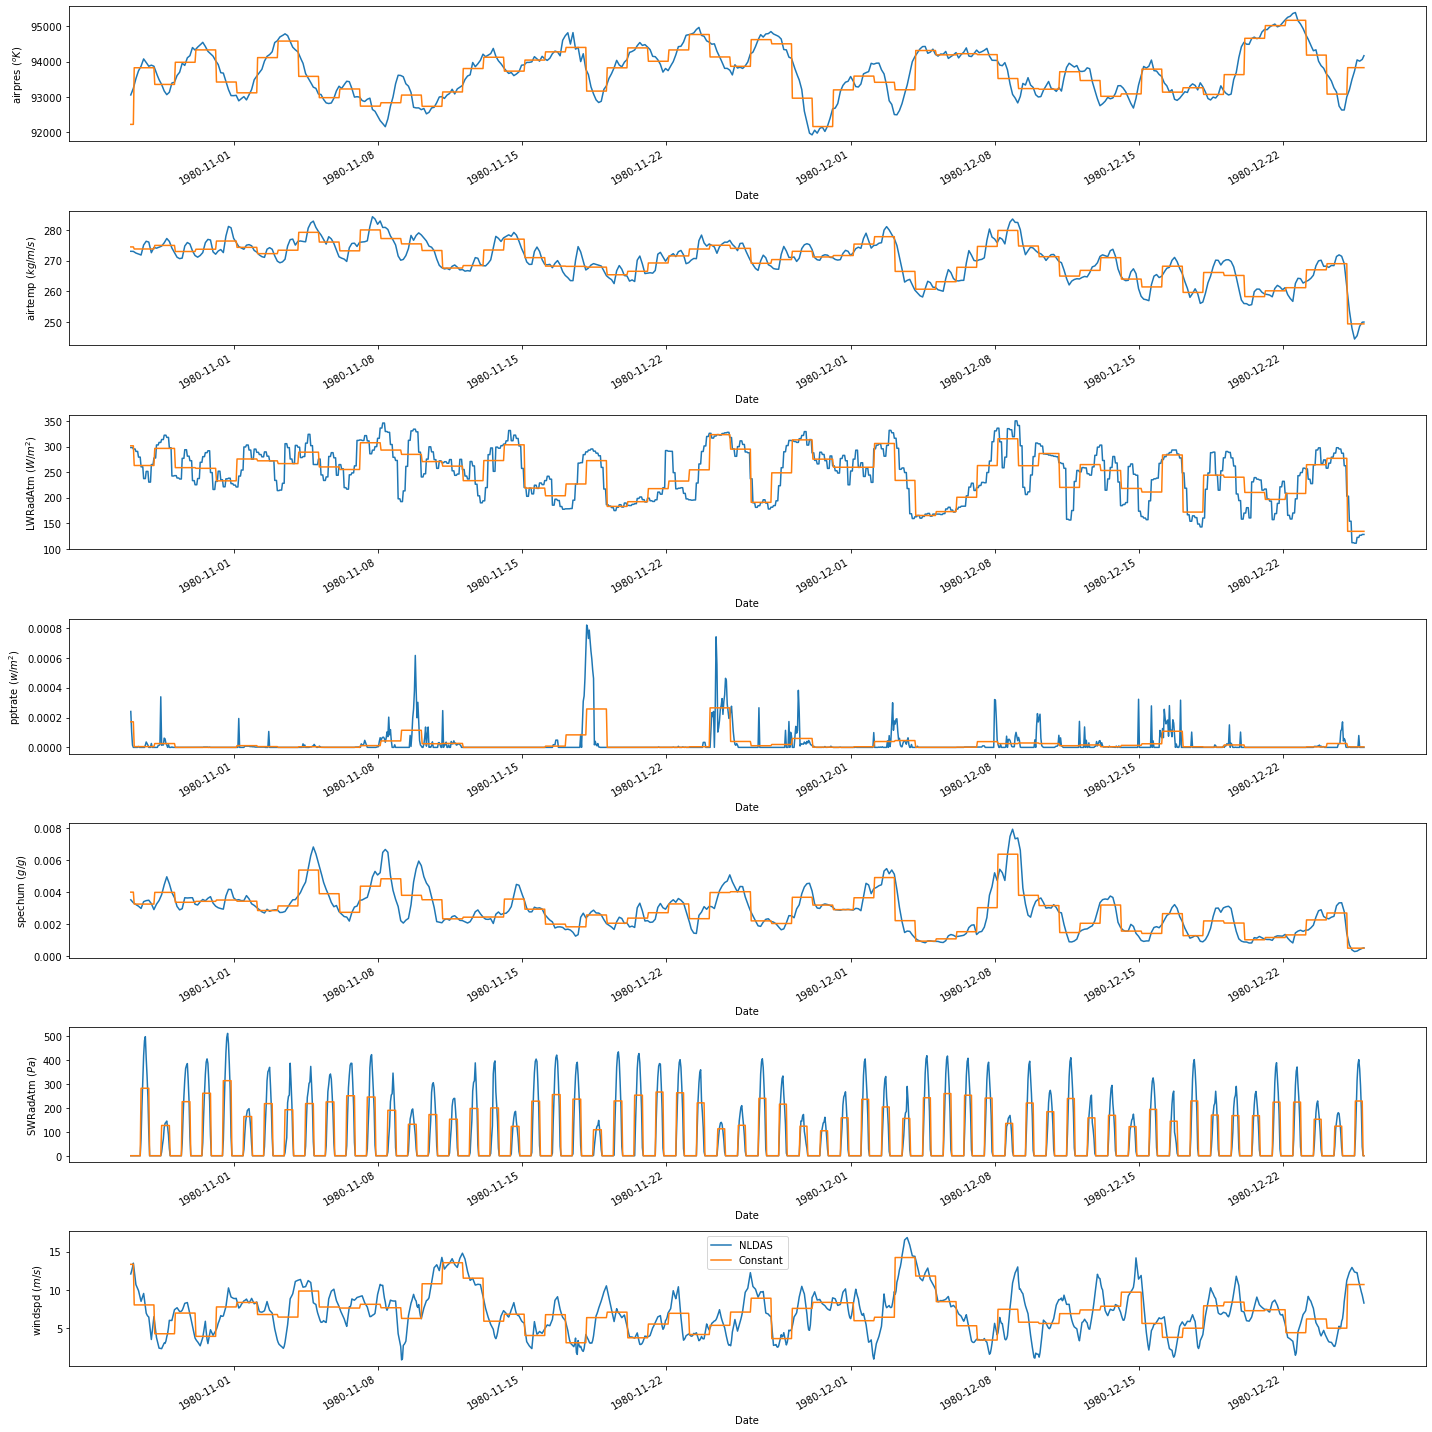

In [32]:
#Plot hourly
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20, 20))
axes = axes.flatten()
axes[0].set_title('Hourly')

unit_str = ['($ ^o K$)', '($kg/m/s$)', '($W/m^2$)','($w/m^2$)','($g/g$)','($Pa$)', '($m/s$)',]

start =  24*7*30 
stop = start + 2*30*24 
#truth starts 90 days earlier
truth_plt = truth.isel(hru=0, time=slice(start+90*24, stop+90*24))
constant_all_plt = constant_all.isel(hru=0, time=slice(start+90*24, stop+90*24))

for idx, var in enumerate(constant_vars):
    truth_plt[var].plot(ax=axes[idx],label='NLDAS')
    constant_all_plt[var].plot(ax=axes[idx],label='Constant')
    axes[idx].set_title('') 
    axes[idx].set_ylabel('{} {}'.format(var, unit_str[idx]))
    axes[idx].set_xlabel('Date')
plt.tight_layout()
plt.legend()

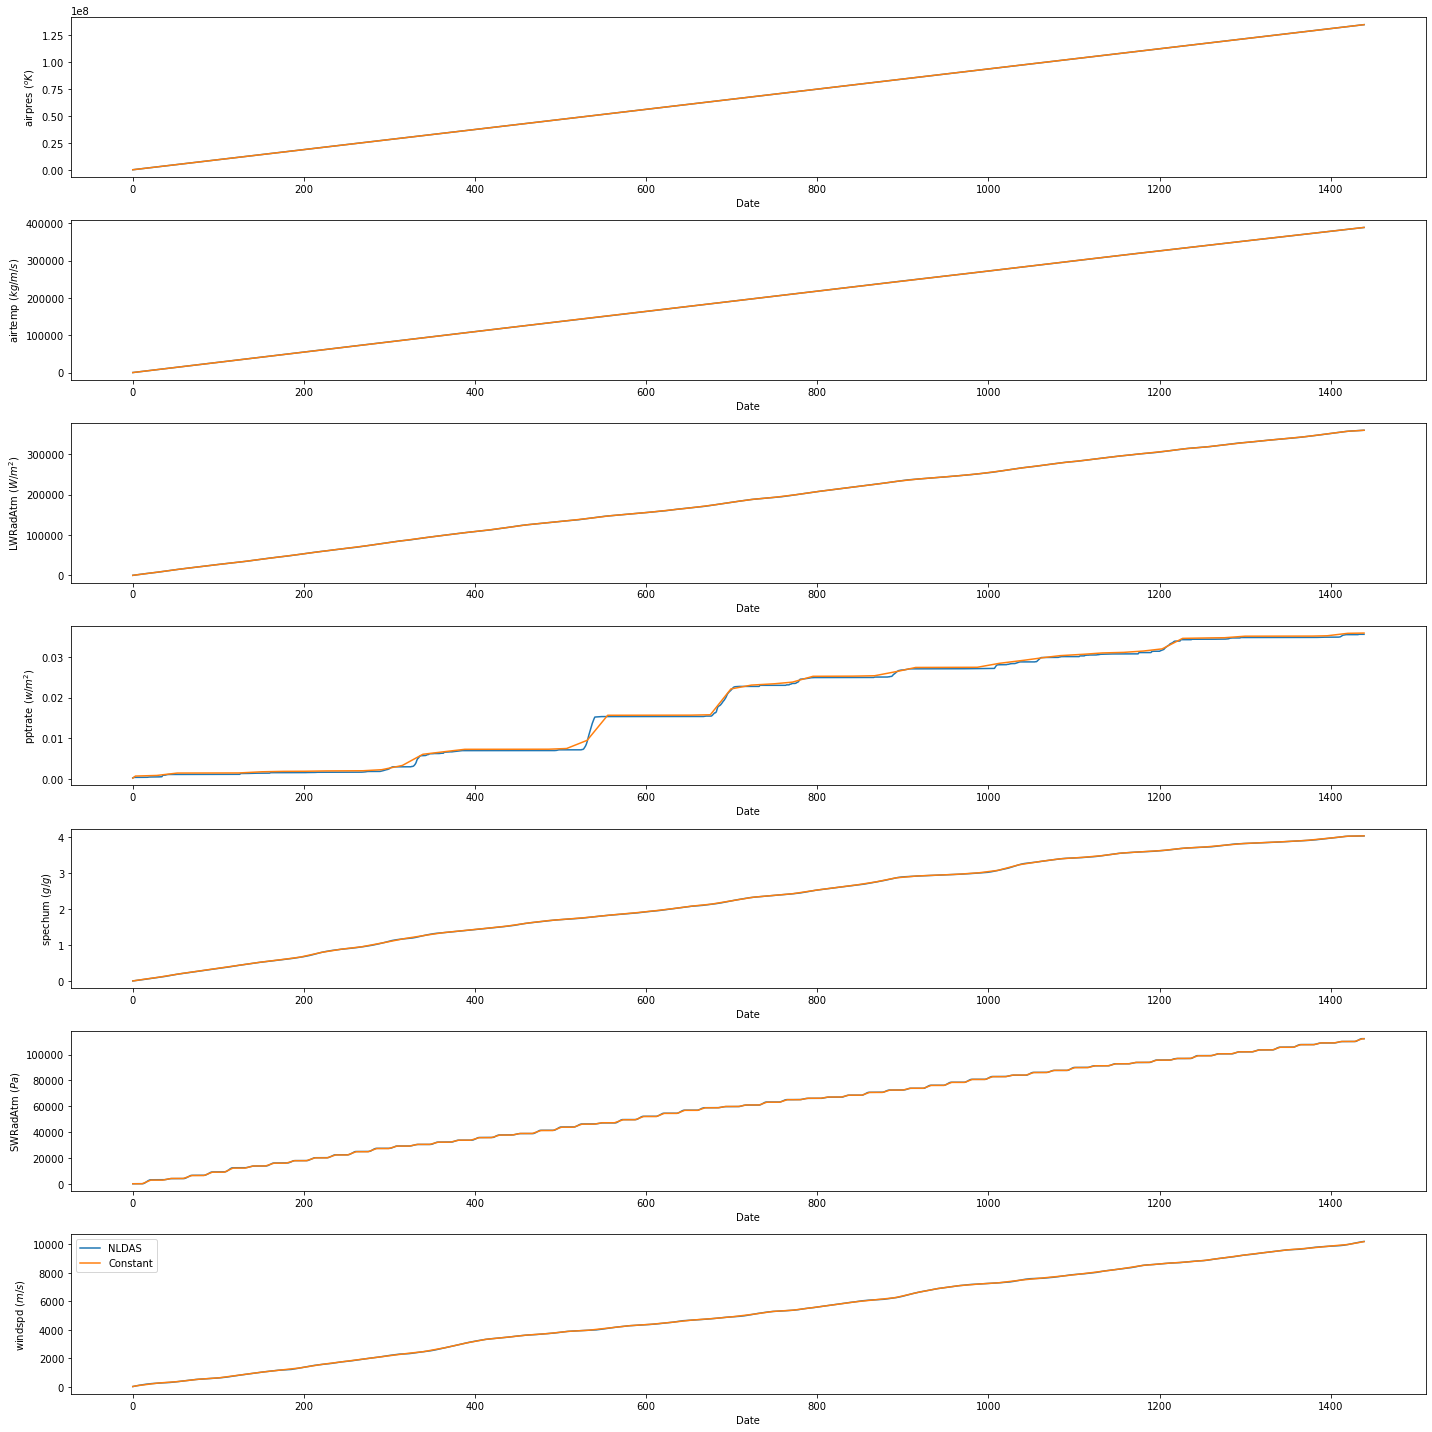

In [33]:
#Plot cummulative
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20, 20))
axes = axes.flatten()
axes[0].set_title('Cumulative')

truth_plt = truth.isel(hru=0, time=slice(start+90*24, stop+90*24)).cumsum(dim='time')
constant_all_plt = constant_all.isel(hru=0, time=slice(start+90*24, stop+90*24)).cumsum(dim='time')

for idx, var in enumerate(constant_vars):
    truth_plt[var].plot(ax=axes[idx],label='NLDAS')
    constant_all_plt[var].plot(ax=axes[idx],label='Constant')
    axes[idx].set_title('') 
    axes[idx].set_ylabel('{} {}'.format(var, unit_str[idx]))
    axes[idx].set_xlabel('Date')
plt.tight_layout()
plt.legend()